### Requires:
multiqc

In [2]:
## Parameters specific to where your folders are and your data
parameter_file = 'params/params.yaml'
import yaml
import sys

with open(parameter_file,'r') as f:
    doc = yaml.load(f)

#p = dic2obj(**doc)

data_folder = doc['data_folder']
tissues = doc['tissues'].split(',')
sys.path.append(doc['pipeline_path'])
ref_fa = doc['ref_fa']
anno_gff=doc['annotation']
mRNA_peak_file = doc["mRNA_peak_file"]

tss_annotation = doc['tss_annotation']

import sarge
import os
os.chdir
import sys
import pandas as pd
import matplotlib
import seaborn as sns
import pickle
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from itertools import product
import glob
import re
from matplotlib_venn import venn2
from matplotlib import rcParams
import inspect
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sys.setrecursionlimit(3000)
%load_ext autoreload
%autoreload 2
rcParams['figure.figsize'] = 8, 6
import tqdm
import matplotlib.patches as mpatches

from os.path import basename
##mpl.use('Agg')
#mpl.style.use('ggplot')
#mpl.style.use('fivethirtyeight')
from Homer import *
import plot_tss_results

print('Number of tissues: ',len(tissues))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
('Number of tissues: ', 13)


In [15]:
if not os.path.exists("Results/Figures/SuppFigure_QC"):
    os.mkdir("Results/Figures/SuppFigure_QC")

In [8]:
meta_samples = pd.read_csv("../raw_metaSamples.tsv",sep='\t',index_col=0)
meta_samples

,Tissue,Experiment,Name,Full
CHBMDM1hKLA2_ATAC_JHS1000_SD_AGGTTGGG_S11_L001_R1_001.fastq.gz,BMDM1hKLA,ATAC,BMDM1hKLA_ATAC1,CHBMDM1hKLA2_ATAC_JHS1000_SD_AGGTTGGG_S11_L001...
CHBMDM1hKLA1_ATAC_JHS998_SD_TGGGTTTC_S9_L001_R1_001.fastq.gz,BMDM1hKLA,ATAC,BMDM1hKLA_ATAC2,CHBMDM1hKLA1_ATAC_JHS998_SD_TGGGTTTC_S9_L001_R...
CHBMDM1hKLA_GRO_JHS1027_SD_CAAAAG_S42_L003_R1_001.fastq.gz,BMDM1hKLA,GRO,BMDM1hKLA_GRO1,CHBMDM1hKLA_GRO_JHS1027_SD_CAAAAG_S42_L003_R1_...
CHBMDM1hKLA_GRO_JHS1034_SD_AGTCAA_S49_L003_R1_001.fastq.gz,BMDM1hKLA,GROCap,BMDM1hKLA_GROCap1,CHBMDM1hKLA_GRO_JHS1034_SD_AGTCAA_S49_L003_R1_...
CHBMDMVehic2_ATAC_JHS999_SD_TGGTCACA_S10_L001_R1_001.fastq.gz,BMDMwt,ATAC,BMDMwt_ATAC1,CHBMDMVehic2_ATAC_JHS999_SD_TGGTCACA_S10_L001_...
CHBMDMVehic1_ATAC_JHS997_SD_GTGTGGTG_S8_L001_R1_001.fastq.gz,BMDMwt,ATAC,BMDMwt_ATAC2,CHBMDMVehic1_ATAC_JHS997_SD_GTGTGGTG_S8_L001_R...
CHBMDMwt_GRO_JHS1026_SD_ATTCCT_S41_L003_R1_001.fastq.gz,BMDMwt,GRO,BMDMwt_GRO1,CHBMDMwt_GRO_JHS1026_SD_ATTCCT_S41_L003_R1_001...
CHBMDMwt_GRO_JHS1033_SD_TAGCTT_S48_L003_R1_001.fastq.gz,BMDMwt,GROCap,BMDMwt_GROCap1,CHBMDMwt_GRO_JHS1033_SD_TAGCTT_S48_L003_R1_001...
CHBrain_ATAC_JHS992_SD_ACCACTGT_S4_L001_R1_001.fastq.gz,Brain,ATAC,Brain_ATAC1,CHBrain_ATAC_JHS992_SD_ACCACTGT_S4_L001_R1_001...
CHBrain_GRO_JHS1029_SD_CACCGG_S44_L003_R1_001.fastq.gz,Brain,GRO,Brain_GRO1,CHBrain_GRO_JHS1029_SD_CACCGG_S44_L003_R1_001....


## Run multiqc for the separate TSS experiments

In [3]:
if not os.path.exists("Results/separate_multiqc"):
    os.mkdir("Results/separate_multiqc")

In [4]:
gro = []
gro5 = []
mstart = []
mstart_input = []


for i in glob.glob(os.path.join(data_folder,"*/")):
    curr_tissue =  i.split('/')[-2]
    curr_raw = glob.glob(i + '*/')
    for j in curr_raw:
        for f in glob.glob(os.path.join(j,'f02_bam/*bamLog.final.out')):
                if 'GROCap' in os.path.basename(f):
                    gro5.append(f)
                elif 'GRO' in os.path.basename(f): #This must be after GROCap
                    gro.append(f)
                elif 'STARTinput' in os.path.basename(f):
                    mstart_input.append(f)
                elif 'START' in os.path.basename(f): #This must be after STARTinput
                    mstart.append(f)
            
        for f in glob.glob(os.path.join(j,'f01_fastqc/*')):
                if 'GROCap' in os.path.basename(f):
                    gro5.append(f)
                elif 'GRO' in os.path.basename(f):
                    gro.append(f)
                elif 'STARTinput' in os.path.basename(f):
                    mstart_input.append(f)
                elif 'START' in os.path.basename(f):
                    mstart.append(f)

In [5]:
cmd = 'multiqc %s -o Results/separate_multiqc/gro' % (' '.join(gro))
print cmd
sarge.run(cmd)

multiqc /data/isshamie/TSS/NCBI_PICR_103_Processed/Brain/GROCap/f02_bam/trim_Brain_GRO1.bamLog.final.out /data/isshamie/TSS/NCBI_PICR_103_Processed/Brain/GROCap/f01_fastqc/trim_Brain_GRO1_fastqc.html /data/isshamie/TSS/NCBI_PICR_103_Processed/Brain/GROCap/f01_fastqc/trim_Brain_GRO1_fastqc.zip /data/isshamie/TSS/NCBI_PICR_103_Processed/CHO/GROCap/f02_bam/trim_CHO_GRO1.bamLog.final.out /data/isshamie/TSS/NCBI_PICR_103_Processed/CHO/GROCap/f02_bam/trim_CHO_GRO2.bamLog.final.out /data/isshamie/TSS/NCBI_PICR_103_Processed/CHO/GROCap/f01_fastqc/trim_CHO_GRO2_fastqc.zip /data/isshamie/TSS/NCBI_PICR_103_Processed/CHO/GROCap/f01_fastqc/trim_CHO_GRO1_fastqc.zip /data/isshamie/TSS/NCBI_PICR_103_Processed/CHO/GROCap/f01_fastqc/trim_CHO_GRO2_fastqc.html /data/isshamie/TSS/NCBI_PICR_103_Processed/CHO/GROCap/f01_fastqc/trim_CHO_GRO1_fastqc.html /data/isshamie/TSS/NCBI_PICR_103_Processed/Kidney/GROCap/f02_bam/trim_Kidney_GRO1.bamLog.final.out /data/isshamie/TSS/NCBI_PICR_103_Processed/Kidney/GROCap/f0

In [6]:
cmd = 'multiqc %s -o Results/separate_multiqc/gro5' % (' '.join(gro5))
print cmd
sarge.run(cmd)

multiqc /data/isshamie/TSS/NCBI_PICR_103_Processed/Brain/GROCap/f02_bam/trim_Brain_GROCap1.bamLog.final.out /data/isshamie/TSS/NCBI_PICR_103_Processed/Brain/GROCap/f01_fastqc/trim_Brain_GROCap1_fastqc.html /data/isshamie/TSS/NCBI_PICR_103_Processed/Brain/GROCap/f01_fastqc/trim_Brain_GROCap1_fastqc.zip /data/isshamie/TSS/NCBI_PICR_103_Processed/CHO/GROCap/f02_bam/trim_CHO_GROCap1.bamLog.final.out /data/isshamie/TSS/NCBI_PICR_103_Processed/CHO/GROCap/f02_bam/trim_CHO_GROCap2.bamLog.final.out /data/isshamie/TSS/NCBI_PICR_103_Processed/CHO/GROCap/f01_fastqc/trim_CHO_GROCap2_fastqc.zip /data/isshamie/TSS/NCBI_PICR_103_Processed/CHO/GROCap/f01_fastqc/trim_CHO_GROCap1_fastqc.zip /data/isshamie/TSS/NCBI_PICR_103_Processed/CHO/GROCap/f01_fastqc/trim_CHO_GROCap2_fastqc.html /data/isshamie/TSS/NCBI_PICR_103_Processed/CHO/GROCap/f01_fastqc/trim_CHO_GROCap1_fastqc.html /data/isshamie/TSS/NCBI_PICR_103_Processed/Kidney/GROCap/f02_bam/trim_Kidney_GROCap1.bamLog.final.out /data/isshamie/TSS/NCBI_PICR_

In [7]:
cmd = 'multiqc %s -o Results/separate_multiqc/mstart' % (' '.join(mstart))
print cmd
sarge.run(cmd)

multiqc /data/isshamie/TSS/NCBI_PICR_103_Processed/Brain/START/f02_bam/trim_Brain_START1.bamLog.final.out /data/isshamie/TSS/NCBI_PICR_103_Processed/Brain/START/f02_bam/trim_Brain_START2.bamLog.final.out /data/isshamie/TSS/NCBI_PICR_103_Processed/Brain/START/f02_bam/trim_Brain_START3.bamLog.final.out /data/isshamie/TSS/NCBI_PICR_103_Processed/Brain/START/f01_fastqc/trim_Brain_START3_fastqc.zip /data/isshamie/TSS/NCBI_PICR_103_Processed/Brain/START/f01_fastqc/trim_Brain_START2_fastqc.html /data/isshamie/TSS/NCBI_PICR_103_Processed/Brain/START/f01_fastqc/trim_Brain_START3_fastqc.html /data/isshamie/TSS/NCBI_PICR_103_Processed/Brain/START/f01_fastqc/trim_Brain_START1_fastqc.html /data/isshamie/TSS/NCBI_PICR_103_Processed/Brain/START/f01_fastqc/trim_Brain_START1_fastqc.zip /data/isshamie/TSS/NCBI_PICR_103_Processed/Brain/START/f01_fastqc/trim_Brain_START2_fastqc.zip /data/isshamie/TSS/NCBI_PICR_103_Processed/CHO/START/f02_bam/trim_CHO_START1.bamLog.final.out /data/isshamie/TSS/NCBI_PICR_10

In [8]:
cmd = 'multiqc %s -o Results/separate_multiqc/mstart_input' % (' '.join(mstart_input))
print cmd
sarge.run(cmd)

multiqc /data/isshamie/TSS/NCBI_PICR_103_Processed/Brain/START/f02_bam/trim_Brain_STARTinput2.bamLog.final.out /data/isshamie/TSS/NCBI_PICR_103_Processed/Brain/START/f02_bam/trim_Brain_STARTinput1.bamLog.final.out /data/isshamie/TSS/NCBI_PICR_103_Processed/Brain/START/f01_fastqc/trim_Brain_STARTinput1_fastqc.html /data/isshamie/TSS/NCBI_PICR_103_Processed/Brain/START/f01_fastqc/trim_Brain_STARTinput2_fastqc.html /data/isshamie/TSS/NCBI_PICR_103_Processed/Brain/START/f01_fastqc/trim_Brain_STARTinput1_fastqc.zip /data/isshamie/TSS/NCBI_PICR_103_Processed/Brain/START/f01_fastqc/trim_Brain_STARTinput2_fastqc.zip /data/isshamie/TSS/NCBI_PICR_103_Processed/CHO/START/f02_bam/trim_CHO_STARTinput1.bamLog.final.out /data/isshamie/TSS/NCBI_PICR_103_Processed/CHO/START/f01_fastqc/trim_CHO_STARTinput1_fastqc.zip /data/isshamie/TSS/NCBI_PICR_103_Processed/CHO/START/f01_fastqc/trim_CHO_STARTinput1_fastqc.html /data/isshamie/TSS/NCBI_PICR_103_Processed/Heart/START/f02_bam/trim_Heart_STARTinput1.bamLog

-------------------

-------------------

-------------------

# Cluster on normalized counts

# 1. Load data 

### Load expression matrix

In [3]:
expr_df = pd.read_csv("Results/merged/samples.merge.peaksexpression.log10",sep="\t",index_col=0)
expr_df.head()

,f04_peaks/MiscOrgans_START1_and_MiscOrgans_startinput1,f04_peaks/Liver_START2_and_Liver_startinput1,f04_peaks/Brain_GROCap1_and_Brain_GRO1,f04_peaks/Liver_START1_and_Liver_startinput1,f04_peaks/Lung_GROCap1_and_Lung_GRO1,f04_peaks/Brain_START3_and_Brain_startinput1,f04_peaks/Heart_START1_and_Heart_startinput1,f04_peaks/CHO_GROCap2_and_CHO_GRO1,f04_peaks/Heart_START2_and_Heart_startinput1,f04_peaks/Liver_GROCap1_and_Liver_GRO1,...,f04_peaks/MiscOrgans_START2_and_MiscOrgans_startinput1,f04_peaks/Spleen_START1_and_Spleen_startinput1,f04_peaks/Lung_START2_and_Lung_startinput1,f04_peaks/CHO_START1_and_CHO_startinput1,f04_peaks/FemaleReproductive_START1_and_FemaleReproductive_startinput1,f04_peaks/Kidney_START2_and_Kidney_startinput1,f04_peaks/Kidney_GROCap1_and_Kidney_GRO1,f04_peaks/CHO_GROCap1_and_CHO_GRO1,f04_peaks/BMDMwt_GROCap1_and_BMDMwt_GRO1,f04_peaks/Spleen_START2_and_Spleen_startinput1
0,0.382017,0.0,0.356026,0.000000,0.877371,0.000000,0.426511,1.515874,0.0,0.000000,...,0.000000,0.000000,0.000000,0.804821,0.000000,0.0,0.868644,1.531479,0.000000,0.000000
1,0.472756,0.0,0.485721,0.633468,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.843855,0.311754,1.619093,0.000000,0.825426,0.0,0.000000,0.000000,0.000000,0.827369
2,0.382017,0.0,0.290480,0.000000,0.680336,0.000000,0.000000,1.372912,0.0,0.000000,...,0.000000,0.000000,0.000000,0.893207,0.436163,0.0,0.451786,1.354108,0.823474,0.545307
3,0.694605,0.0,0.000000,0.000000,0.000000,0.627366,0.426511,0.000000,0.0,0.000000,...,0.491362,0.649335,0.000000,0.617000,0.000000,0.0,0.000000,0.559907,0.537819,0.517196
4,2.220892,0.0,0.456366,1.918030,0.000000,1.648360,1.717671,0.000000,0.0,0.919078,...,1.776701,1.283301,0.000000,1.968016,0.000000,0.0,0.401401,0.761928,0.642465,2.203848


### Change the column names

In [4]:
cols = expr_df.columns.values
cols = list(map(lambda x: os.path.basename(x),cols))
expr_df.columns = cols
expr_df.head()

,MiscOrgans_START1_and_MiscOrgans_startinput1,Liver_START2_and_Liver_startinput1,Brain_GROCap1_and_Brain_GRO1,Liver_START1_and_Liver_startinput1,Lung_GROCap1_and_Lung_GRO1,Brain_START3_and_Brain_startinput1,Heart_START1_and_Heart_startinput1,CHO_GROCap2_and_CHO_GRO1,Heart_START2_and_Heart_startinput1,Liver_GROCap1_and_Liver_GRO1,...,MiscOrgans_START2_and_MiscOrgans_startinput1,Spleen_START1_and_Spleen_startinput1,Lung_START2_and_Lung_startinput1,CHO_START1_and_CHO_startinput1,FemaleReproductive_START1_and_FemaleReproductive_startinput1,Kidney_START2_and_Kidney_startinput1,Kidney_GROCap1_and_Kidney_GRO1,CHO_GROCap1_and_CHO_GRO1,BMDMwt_GROCap1_and_BMDMwt_GRO1,Spleen_START2_and_Spleen_startinput1
0,0.382017,0.0,0.356026,0.000000,0.877371,0.000000,0.426511,1.515874,0.0,0.000000,...,0.000000,0.000000,0.000000,0.804821,0.000000,0.0,0.868644,1.531479,0.000000,0.000000
1,0.472756,0.0,0.485721,0.633468,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.843855,0.311754,1.619093,0.000000,0.825426,0.0,0.000000,0.000000,0.000000,0.827369
2,0.382017,0.0,0.290480,0.000000,0.680336,0.000000,0.000000,1.372912,0.0,0.000000,...,0.000000,0.000000,0.000000,0.893207,0.436163,0.0,0.451786,1.354108,0.823474,0.545307
3,0.694605,0.0,0.000000,0.000000,0.000000,0.627366,0.426511,0.000000,0.0,0.000000,...,0.491362,0.649335,0.000000,0.617000,0.000000,0.0,0.000000,0.559907,0.537819,0.517196
4,2.220892,0.0,0.456366,1.918030,0.000000,1.648360,1.717671,0.000000,0.0,0.919078,...,1.776701,1.283301,0.000000,1.968016,0.000000,0.0,0.401401,0.761928,0.642465,2.203848


### Load promoter metadata

In [5]:
promoter_meta = pd.read_csv("Results/output/TSS1.exp.meta",sep="\t",index_col=0)
promoter_meta.head()

,Tissues,cs,CHO ATAC Region,ID,Gene,Gene ID,Transcript,Is Experimental
p1@Bmp4_XM_027386529.1,"Spleen,MiscOrgans,FemaleReproductive,Brain,Lun...",0b11,NaN,348823,Bmp4,NaN,XM_027386529.1,1.0
p2@Bmp4_XM_027386529.1,"Spleen,MiscOrgans,FemaleReproductive,Brain,Lun...",0b00,NaN,90264,Bmp4,NaN,XM_027386529.1,1.0
p3@Bmp4_XM_027386529.1,"Spleen,MiscOrgans,FemaleReproductive,Brain,Lun...",0b00,NaN,181215,Bmp4,NaN,XM_027386529.1,1.0
p1@Bmp4_XM_027386528.1,"Heart,Spleen,MiscOrgans,FemaleReproductive,Bra...",0b11,NaN,308710,Bmp4,NaN,XM_027386528.1,1.0
p1@Cdkn3_XM_027386531.1,"BMDMwt,Spleen,MiscOrgans,FemaleReproductive,CH...",0b11,NaN,237253,Cdkn3,NaN,XM_027386531.1,1.0


# 2. Create columns labels

In [10]:
exp_dict = dict()
start_site_cols = ["GROCap","START"]
for i in expr_df.columns.values:
    for j in start_site_cols:
        if j in i:
            if i in exp_dict:
                print("Both methods are found in the name?!")
            exp_dict[i] = j
            
tis_dict = dict()
tis_cols = tissues
for i in expr_df.columns.values:
    for j in tis_cols:
        if j in i:
            if i in tis_dict:
                print("Multiple tissues are found in the name?!")
            tis_dict[i] = j
tis_dict

#col_colors = meta_samples.loc[expr_df.columns.values,'Experiment'].map(lut)


{'BMDM1hKLA_GROCap1_and_BMDM1hKLA_GRO1': 'BMDM1hKLA',
 'BMDMwt_GROCap1_and_BMDMwt_GRO1': 'BMDMwt',
 'Brain_GROCap1_and_Brain_GRO1': 'Brain',
 'Brain_START1_and_Brain_startinput1': 'Brain',
 'Brain_START1_and_Brain_startinput2': 'Brain',
 'Brain_START2_and_Brain_startinput1': 'Brain',
 'Brain_START2_and_Brain_startinput2': 'Brain',
 'Brain_START3_and_Brain_startinput1': 'Brain',
 'Brain_START3_and_Brain_startinput2': 'Brain',
 'CHO_GROCap1_and_CHO_GRO1': 'CHO',
 'CHO_GROCap1_and_CHO_GRO2': 'CHO',
 'CHO_GROCap2_and_CHO_GRO1': 'CHO',
 'CHO_GROCap2_and_CHO_GRO2': 'CHO',
 'CHO_START1_and_CHO_startinput1': 'CHO',
 'FemaleReproductive_START1_and_FemaleReproductive_startinput1': 'FemaleReproductive',
 'FemaleReproductive_START2_and_FemaleReproductive_startinput1': 'FemaleReproductive',
 'Heart_START1_and_Heart_startinput1': 'Heart',
 'Heart_START2_and_Heart_startinput1': 'Heart',
 'Kidney_GROCap1_and_Kidney_GRO1': 'Kidney',
 'Kidney_START1_and_Kidney_startinput1': 'Kidney',
 'Kidney_START2_and

# 3. Plot

## Binary all peaks

/home/isshamie/software/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/isshamie/software/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


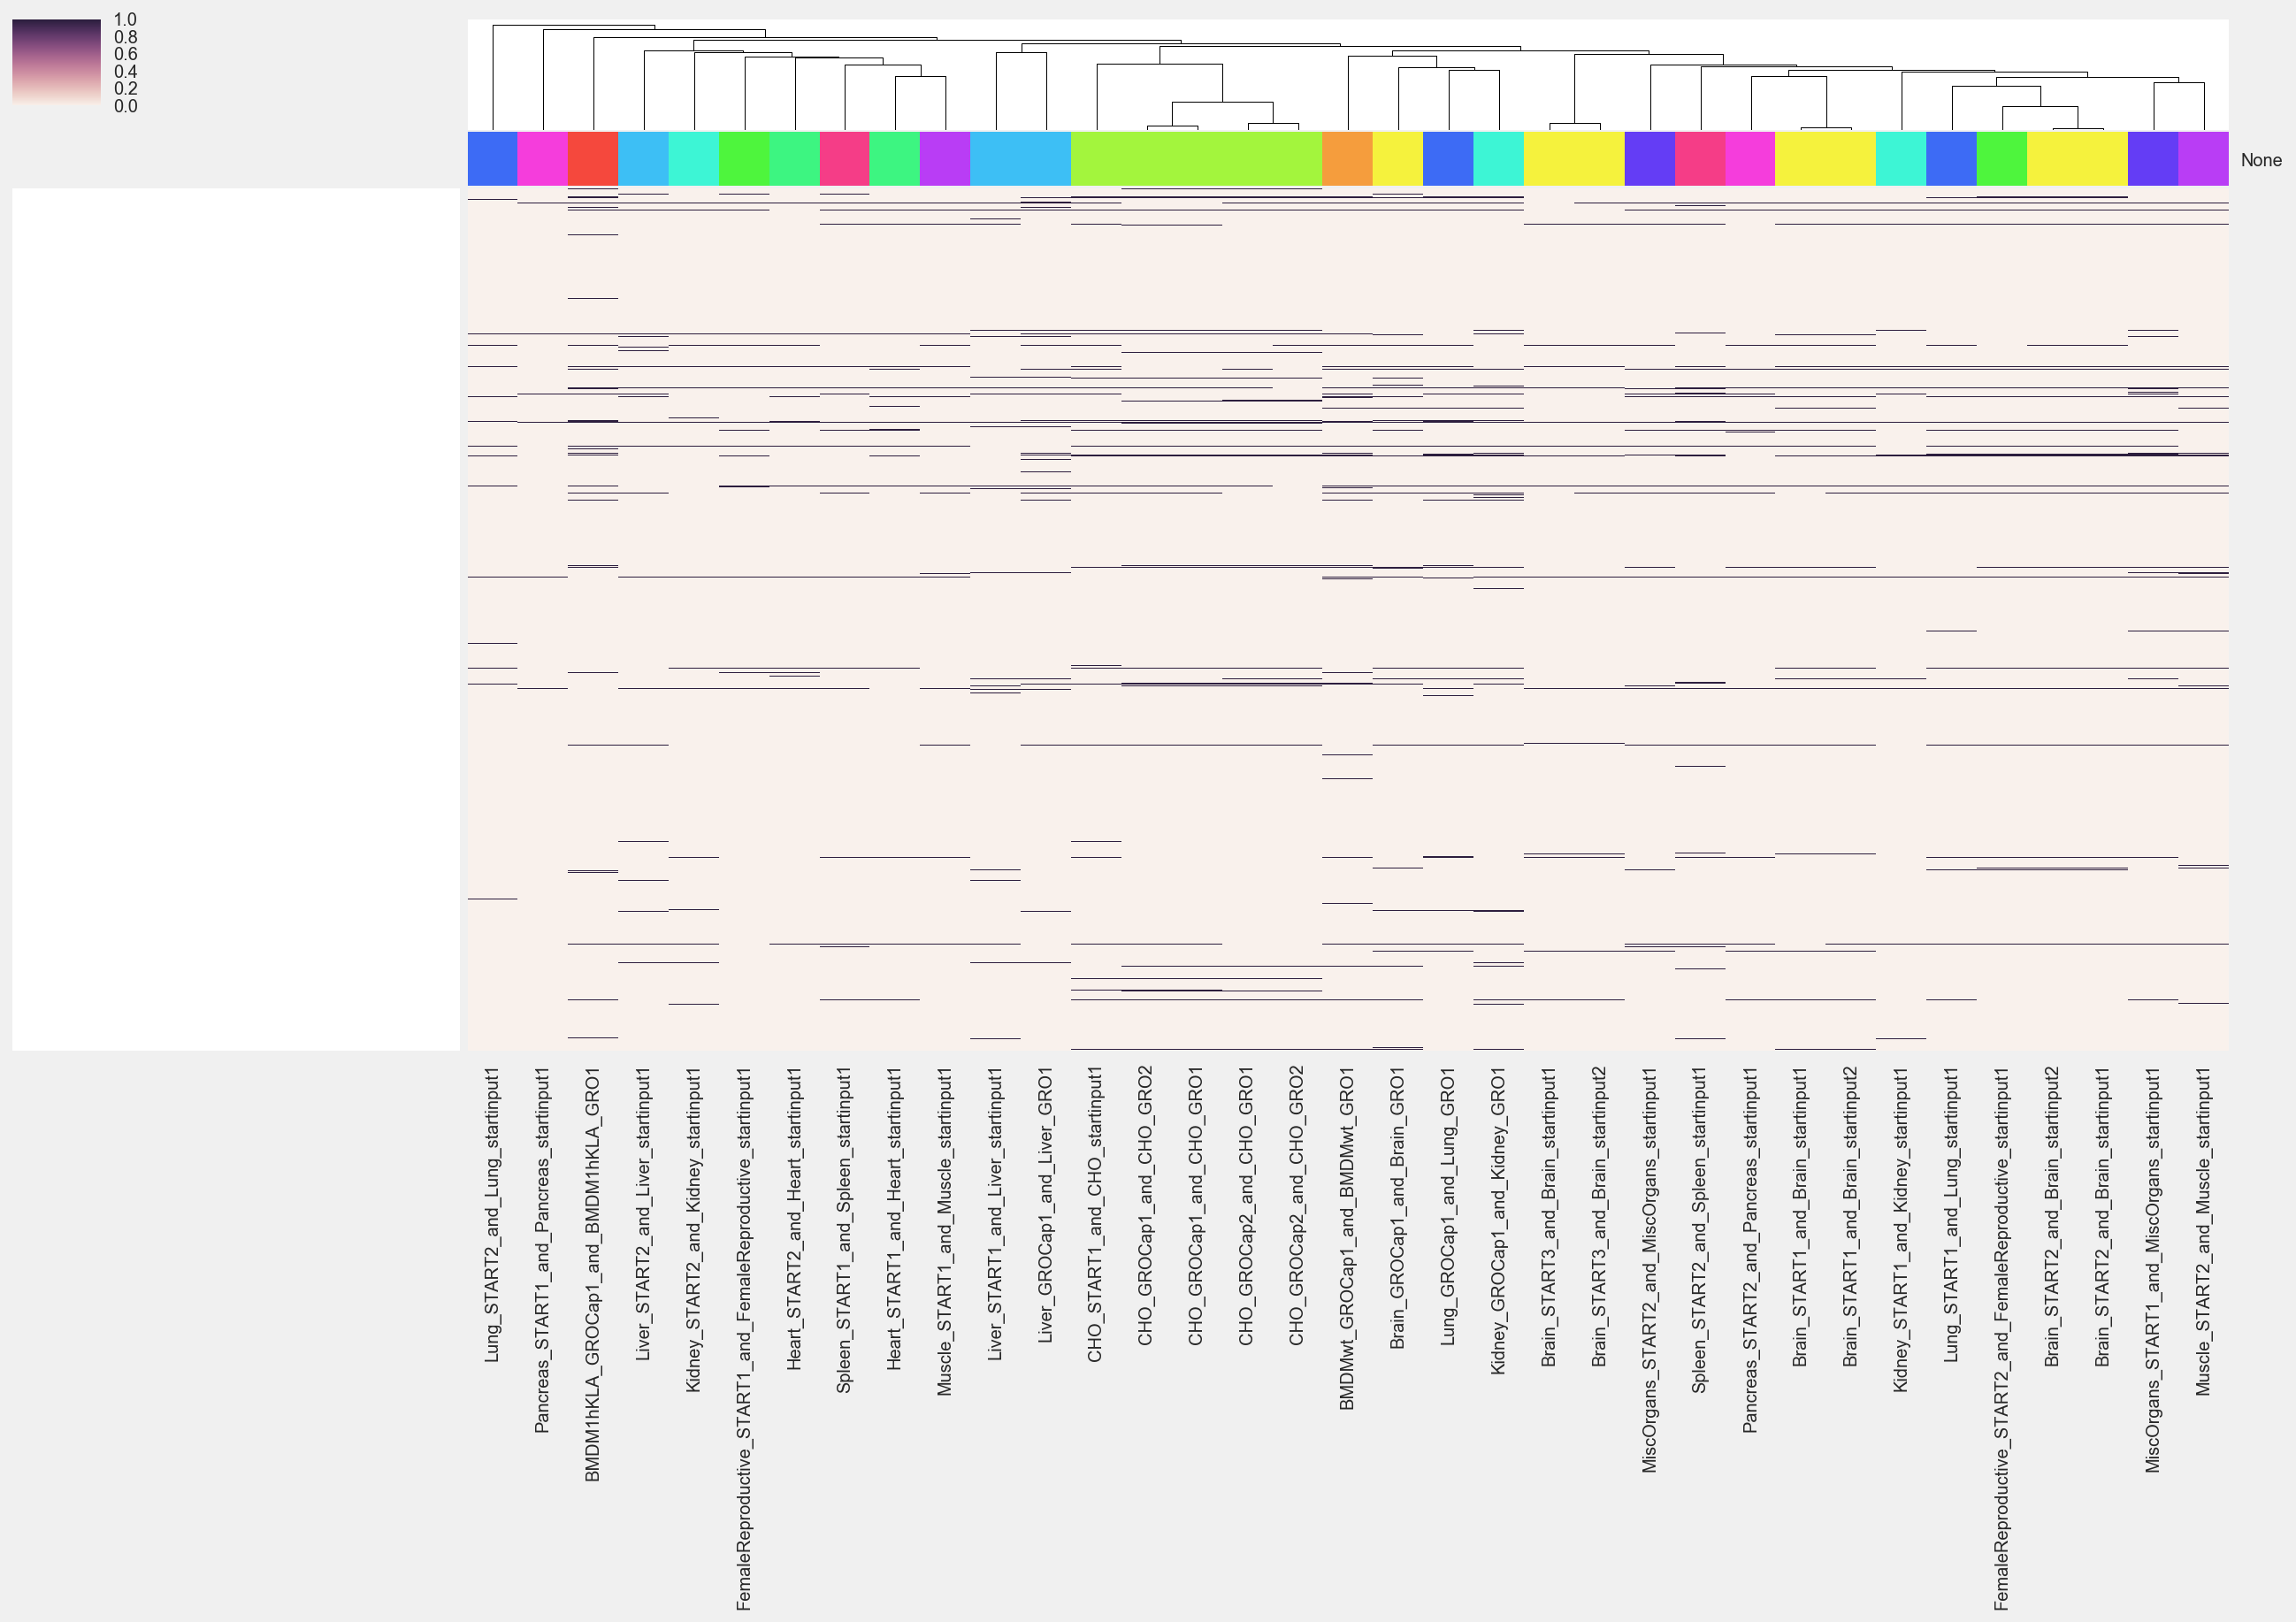

In [118]:
binary_prom = (expr_df > 1)
n_tis = len(tissues)

# Setup colors
lut = dict(zip(np.unique(exp_dict.values()), "rb"))
col_colors = pd.Series(exp_dict).map(lut)

lut2 = dict(zip(np.unique(tis_dict.values()), sns.hls_palette(n_tis,s=0.9)))
col_colors2 = pd.Series(tis_dict).map(lut2)

#legend_TN = [mpatches.Patch(color=i[1], label=i[0]) for i in col_colors2.iteritems()]
legend_TN = [mpatches.Patch(color=lut2[i], label=i) for i in lut2]

# Cluster and pl ot
# g = sns.clustermap(binary_prom,col_cluster=True,figsize=(20,10),metric='jaccard',row_cluster=False
#                    ,yticklabels=False,col_colors=[col_colors,col_colors2])#,xticklabels=meta_samples.loc[binary_prom.columns.values,'Short'])

g = sns.clustermap(binary_prom,col_cluster=True,figsize=(20,10),metric='jaccard',row_cluster=False
                   ,yticklabels=False,col_colors=col_colors2)#,xticklabels=meta_samples.loc[binary_prom.columns.values,'Short'])

# Setup legend
# l2=g.ax_heatmap.legend(loc='center left',bbox_to_anchor=(1.01,0.85),handles=legend_TN,frameon=True)
# l2.set_title(title='tissue type',prop={'size':12})

title = 'Number of rows = %d \n Blue = GRO Red=mSTART' % len(binary_prom)
#plt.title(title)
#g.savefig('Results/Figures/SuppFigure_QC/duplicatePeaks_binary_jaccard_promoter_peak_cluster.png',bbox_inches='tight')

/home/isshamie/software/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/isshamie/software/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,u'Number of rows = 540127 \n Blue = GRO Red=mSTART')

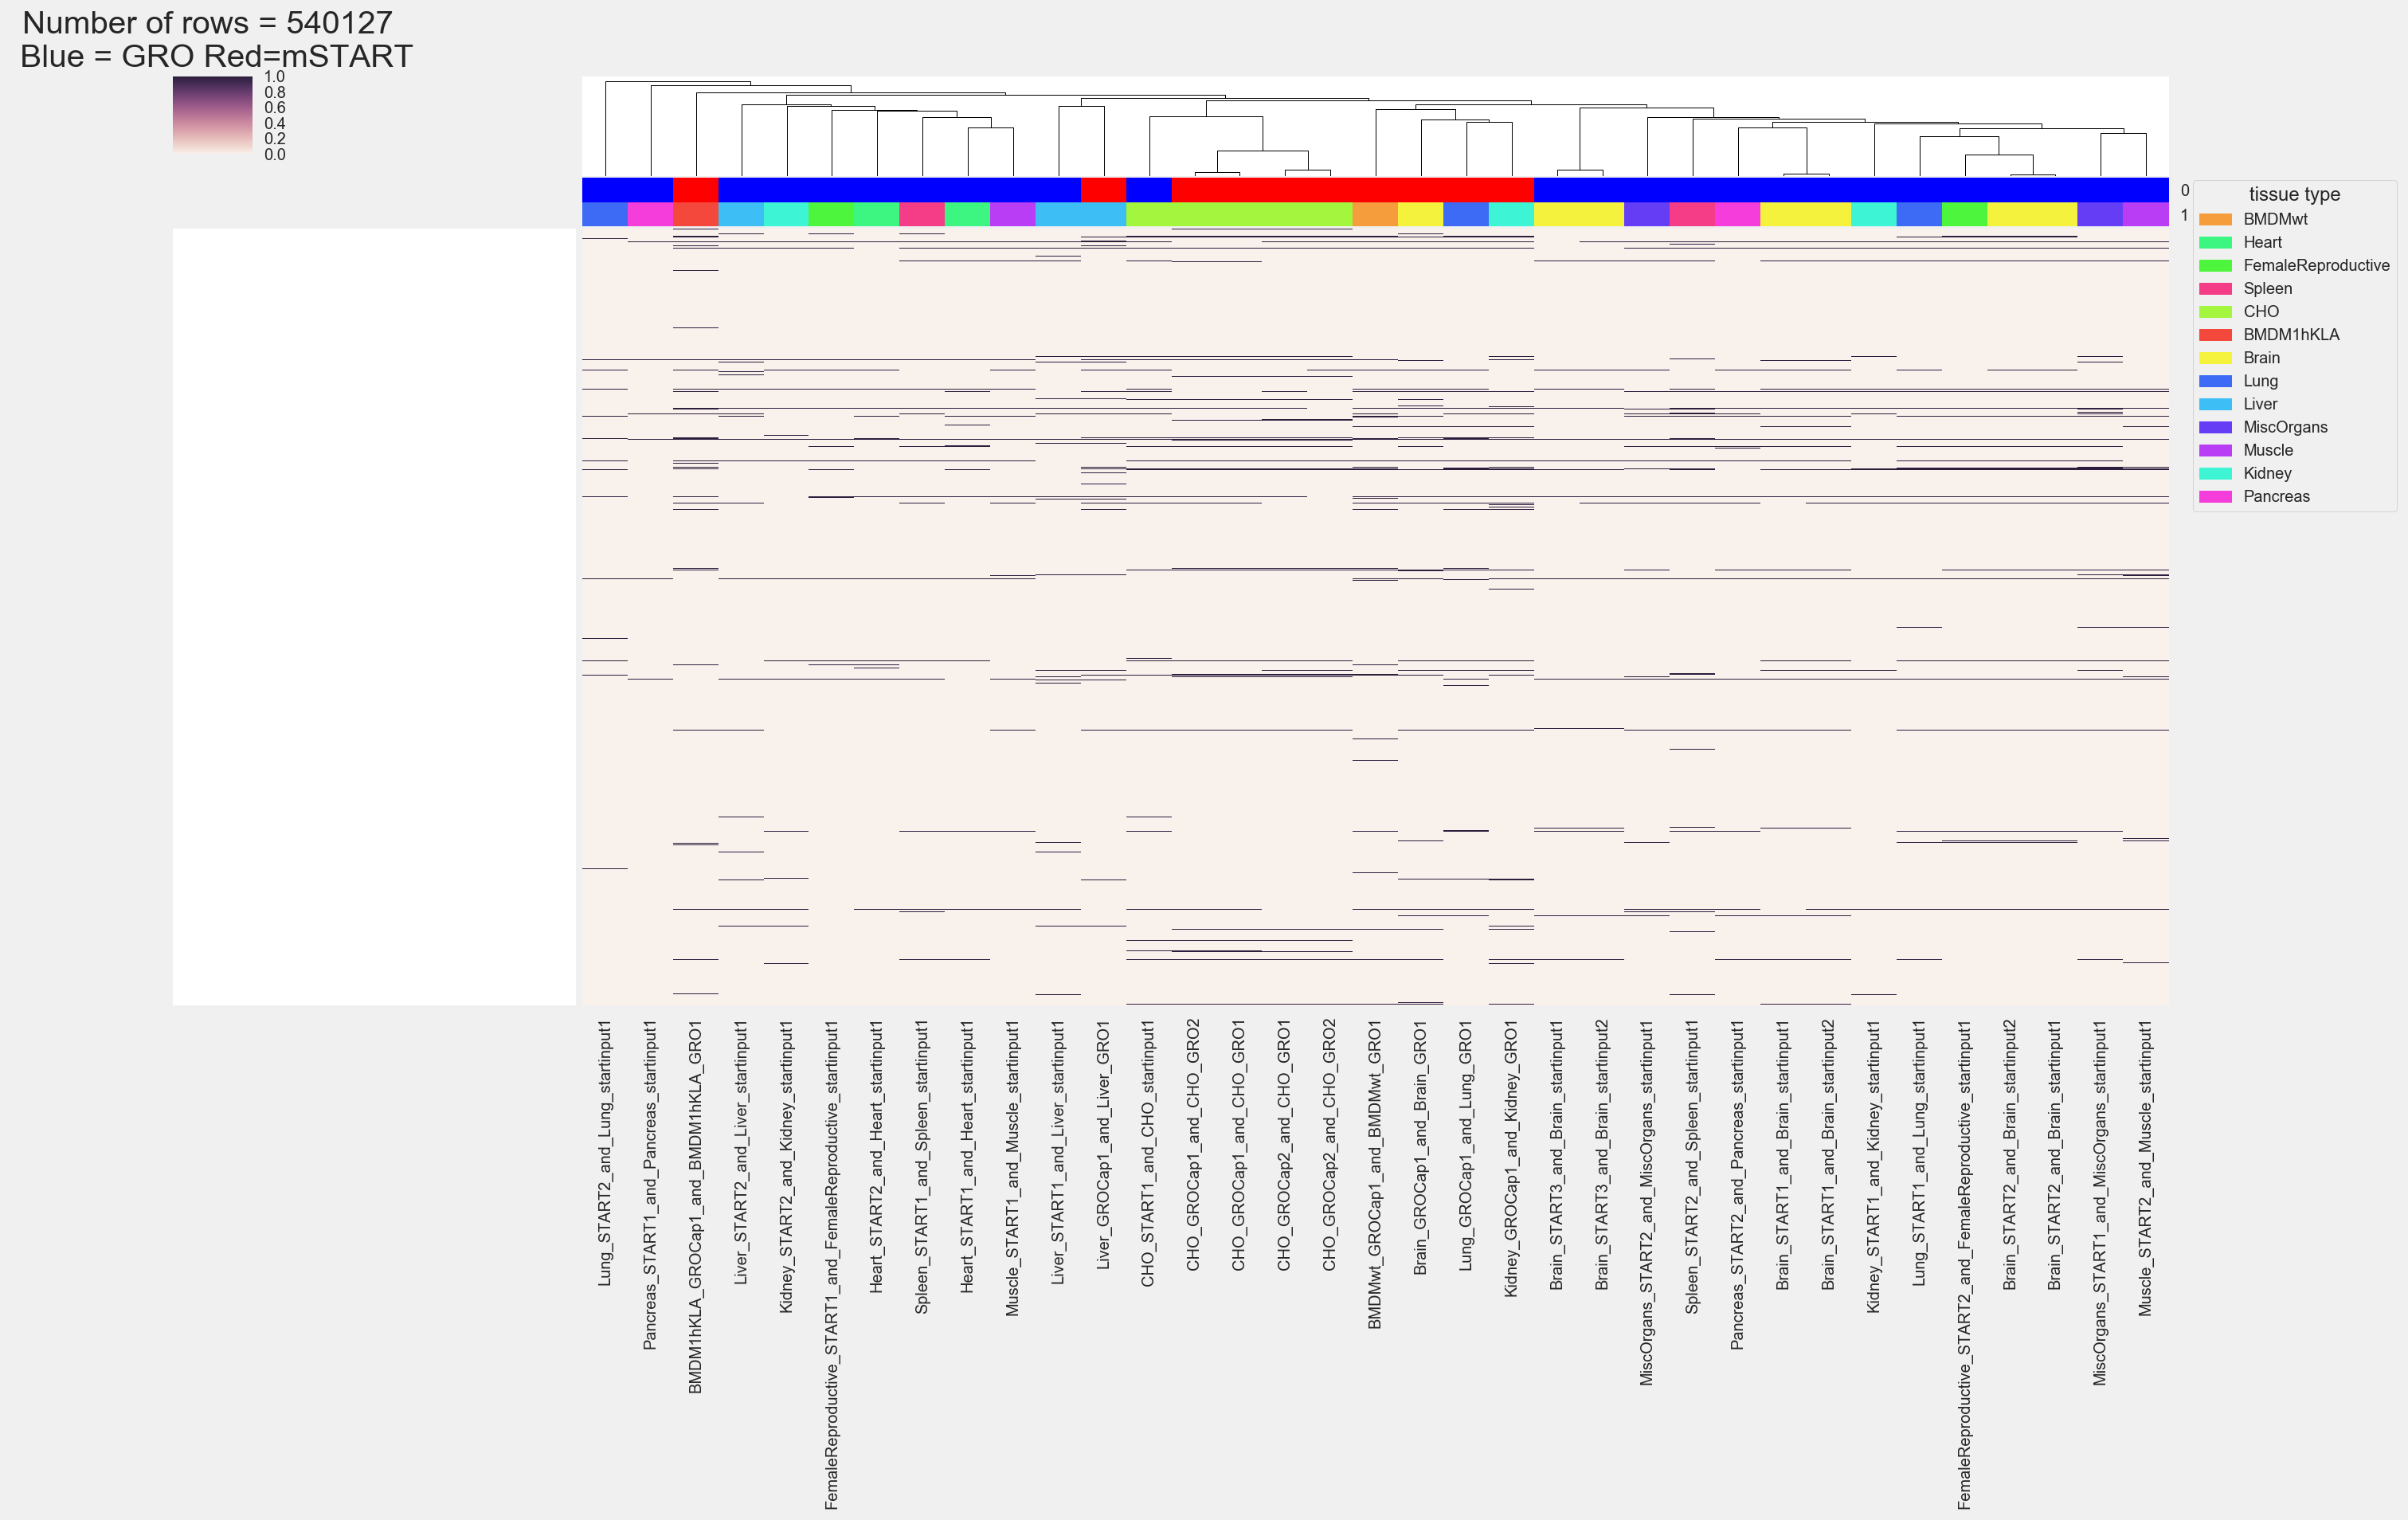

In [121]:
binary_prom = (expr_df > 1)
n_tis = len(tissues)

# Setup colors
lut = dict(zip(np.unique(exp_dict.values()), "rb"))
col_colors = pd.Series(exp_dict).map(lut)

lut2 = dict(zip(np.unique(tis_dict.values()), sns.hls_palette(n_tis,s=0.9)))
col_colors2 = pd.Series(tis_dict).map(lut2)

#legend_TN = [mpatches.Patch(color=i[1], label=i[0]) for i in col_colors2.iteritems()]
legend_TN = [mpatches.Patch(color=lut2[i], label=i) for i in lut2]

# Cluster and pl ot
# g = sns.clustermap(binary_prom,col_cluster=True,figsize=(20,10),metric='jaccard',row_cluster=False
#                    ,yticklabels=False,col_colors=[col_colors,col_colors2])#,xticklabels=meta_samples.loc[binary_prom.columns.values,'Short'])

g = sns.clustermap(binary_prom,col_cluster=True,figsize=(20,10),metric='jaccard',row_cluster=False
                   ,yticklabels=False,col_colors=pd.DataFrame([col_colors,col_colors2]).transpose())#,xticklabels=meta_samples.loc[binary_prom.columns.values,'Short'])

# Setup legend
l2=g.ax_heatmap.legend(loc='center left',bbox_to_anchor=(1.01,0.85),handles=legend_TN,frameon=True)
l2.set_title(title='tissue type',prop={'size':12})

title = 'Number of rows = %d \n Blue = GRO Red=mSTART' % len(binary_prom)
plt.title(title)
#g.savefig('Results/Figures/SuppFigure_QC/duplicatePeaks_binary_jaccard_promoter_peak_cluster.png',bbox_inches='tight')

## Look at Promoters

/home/isshamie/software/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/isshamie/software/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,u'Promoter TSSs. Number of rows = 30775 \n Blue = GRO Red=mSTART')

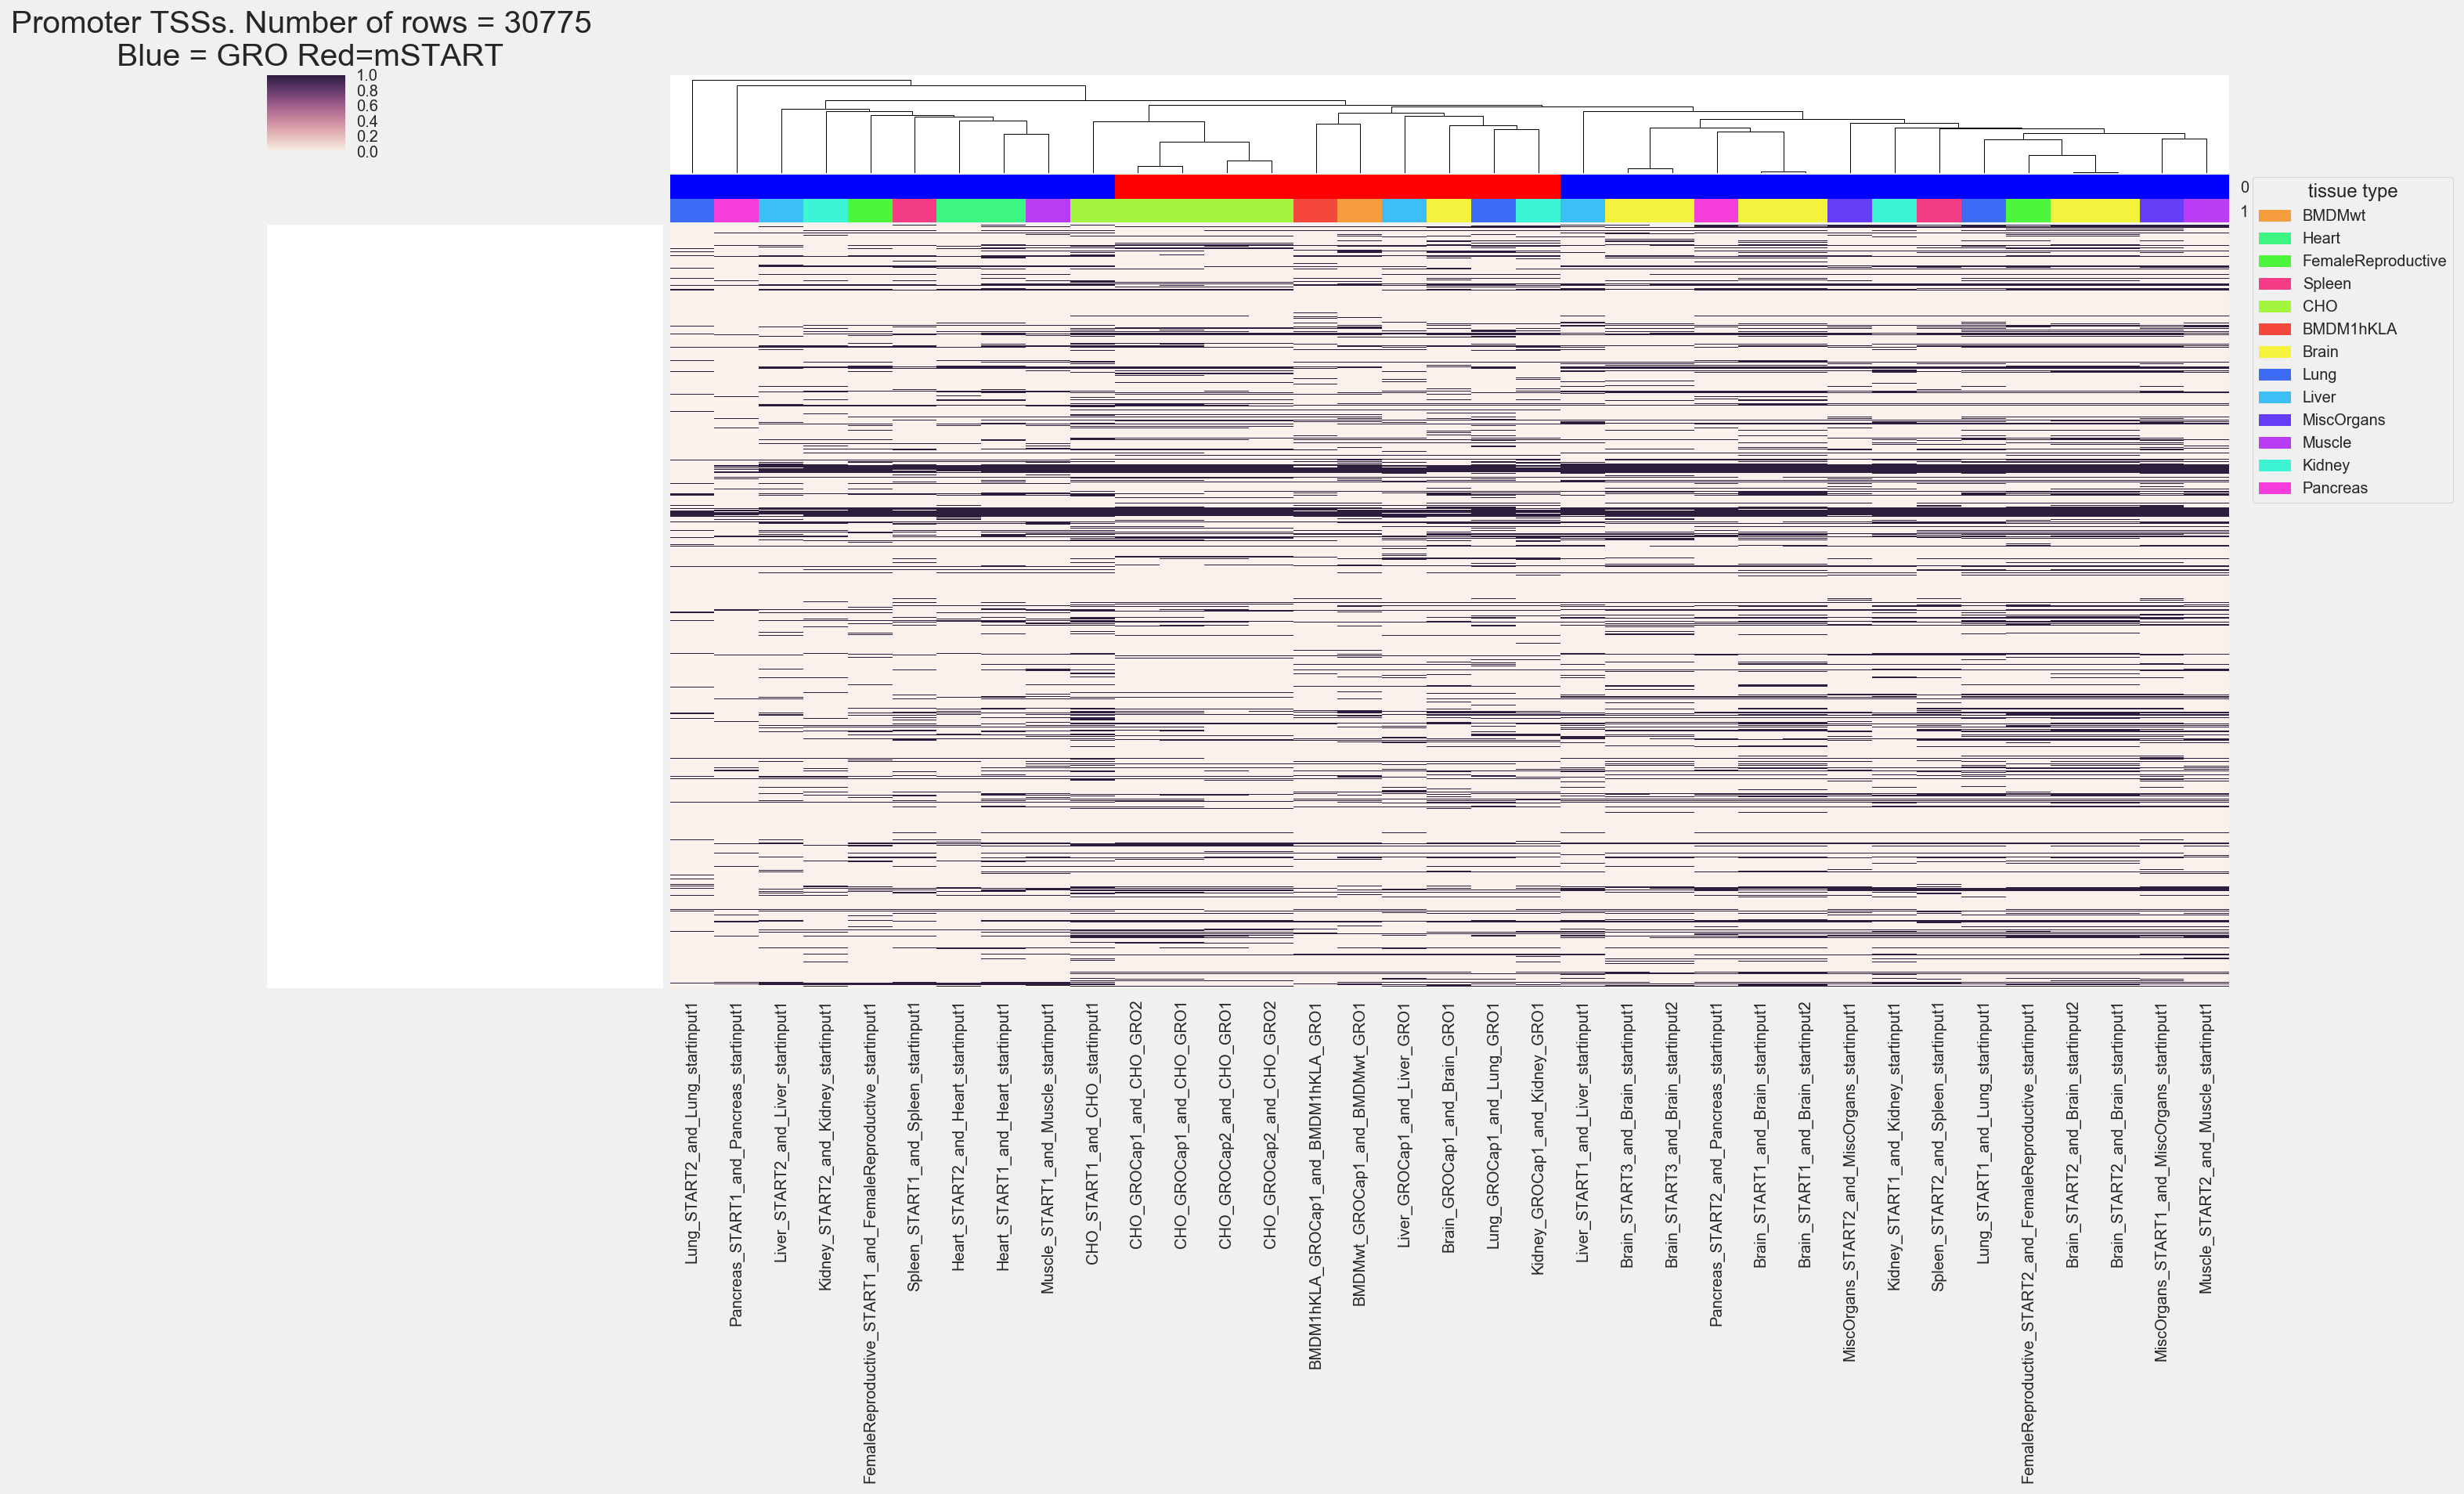

In [126]:
binary_prom = (expr_df[expr_df.index.isin(promoter_meta["ID"])] > 1)
n_tis = len(tissues)

# Setup colors
lut = dict(zip(np.unique(exp_dict.values()), "rb"))
col_colors = pd.Series(exp_dict).map(lut)

lut2 = dict(zip(np.unique(tis_dict.values()), sns.hls_palette(n_tis,s=0.9)))
col_colors2 = pd.Series(tis_dict).map(lut2)

#legend_TN = [mpatches.Patch(color=i[1], label=i[0]) for i in col_colors2.iteritems()]
legend_TN = [mpatches.Patch(color=lut2[i], label=i) for i in lut2]

# Cluster and pl ot
# g = sns.clustermap(binary_prom,col_cluster=True,figsize=(20,10),metric='jaccard',row_cluster=False
#                    ,yticklabels=False,col_colors=[col_colors,col_colors2])#,xticklabels=meta_samples.loc[binary_prom.columns.values,'Short'])

g = sns.clustermap(binary_prom,col_cluster=True,figsize=(20,10),metric='jaccard',row_cluster=False
                   ,yticklabels=False,col_colors=pd.DataFrame([col_colors,col_colors2]).transpose())#,xticklabels=meta_samples.loc[binary_prom.columns.values,'Short'])

# Setup legend
l2=g.ax_heatmap.legend(loc='center left',bbox_to_anchor=(1.01,0.85),handles=legend_TN,frameon=True)
l2.set_title(title='tissue type',prop={'size':12})

title = 'Promoter TSSs. Number of rows = %d \n Blue = GRO Red=mSTART' % len(binary_prom)
plt.title(title)
#g.savefig('Results/Figures/SuppFigure_QC/duplicatePeaks_binary_jaccard_promoter_peak_cluster.png',bbox_inches='tight')

/home/isshamie/software/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/isshamie/software/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,u'Promoter TSSs. Number of rows = 30775 \n Blue = GRO Red=mSTART')

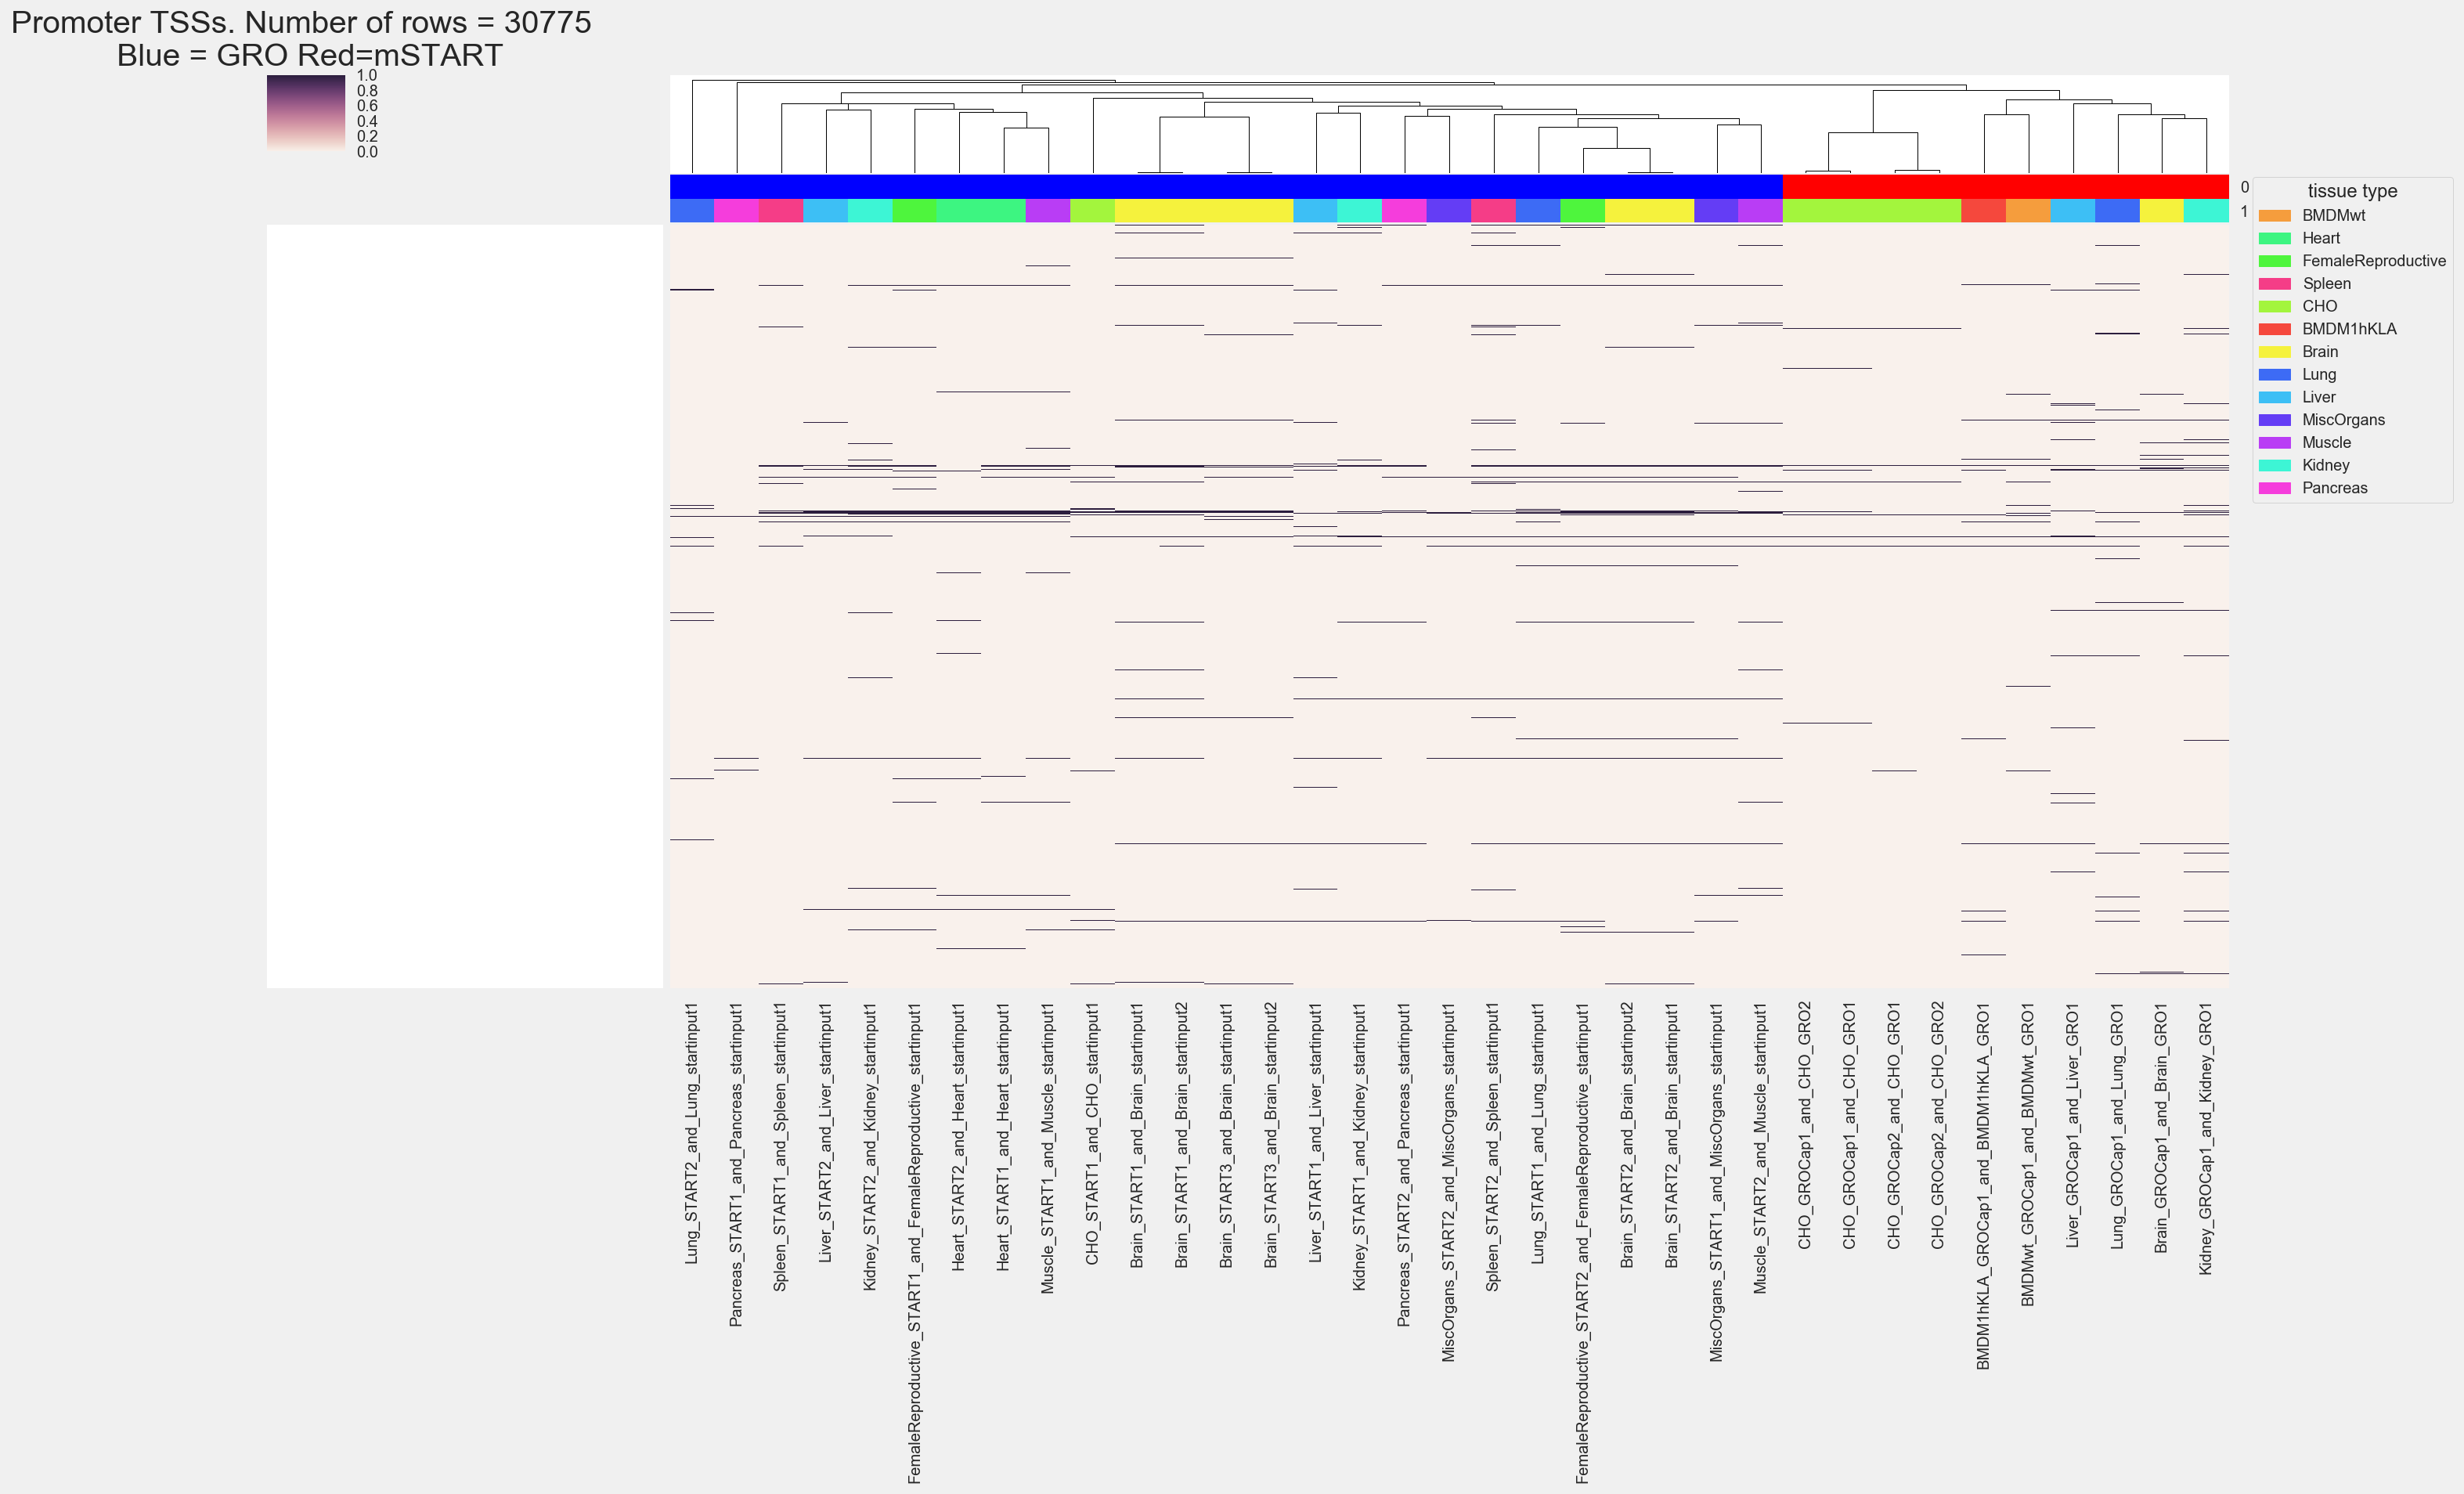

In [129]:
binary_prom = (expr_df[expr_df.index.isin(promoter_meta["ID"])] > 2)
n_tis = len(tissues)

# Setup colors
lut = dict(zip(np.unique(exp_dict.values()), "rb"))
col_colors = pd.Series(exp_dict).map(lut)

lut2 = dict(zip(np.unique(tis_dict.values()), sns.hls_palette(n_tis,s=0.9)))
col_colors2 = pd.Series(tis_dict).map(lut2)

#legend_TN = [mpatches.Patch(color=i[1], label=i[0]) for i in col_colors2.iteritems()]
legend_TN = [mpatches.Patch(color=lut2[i], label=i) for i in lut2]

# Cluster and pl ot
# g = sns.clustermap(binary_prom,col_cluster=True,figsize=(20,10),metric='jaccard',row_cluster=False
#                    ,yticklabels=False,col_colors=[col_colors,col_colors2])#,xticklabels=meta_samples.loc[binary_prom.columns.values,'Short'])

g = sns.clustermap(binary_prom,col_cluster=True,figsize=(20,10),metric='jaccard',row_cluster=False
                   ,yticklabels=False,col_colors=pd.DataFrame([col_colors,col_colors2]).transpose())#,xticklabels=meta_samples.loc[binary_prom.columns.values,'Short'])

# Setup legend
l2=g.ax_heatmap.legend(loc='center left',bbox_to_anchor=(1.01,0.85),handles=legend_TN,frameon=True)
l2.set_title(title='tissue type',prop={'size':12})

title = 'Promoter TSSs. Number of rows = %d \n Blue = GRO Red=mSTART' % len(binary_prom)
plt.title(title)
#g.savefig('Results/Figures/SuppFigure_QC/duplicatePeaks_binary_jaccard_promoter_peak_cluster.png',bbox_inches='tight')

/home/isshamie/software/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/isshamie/software/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


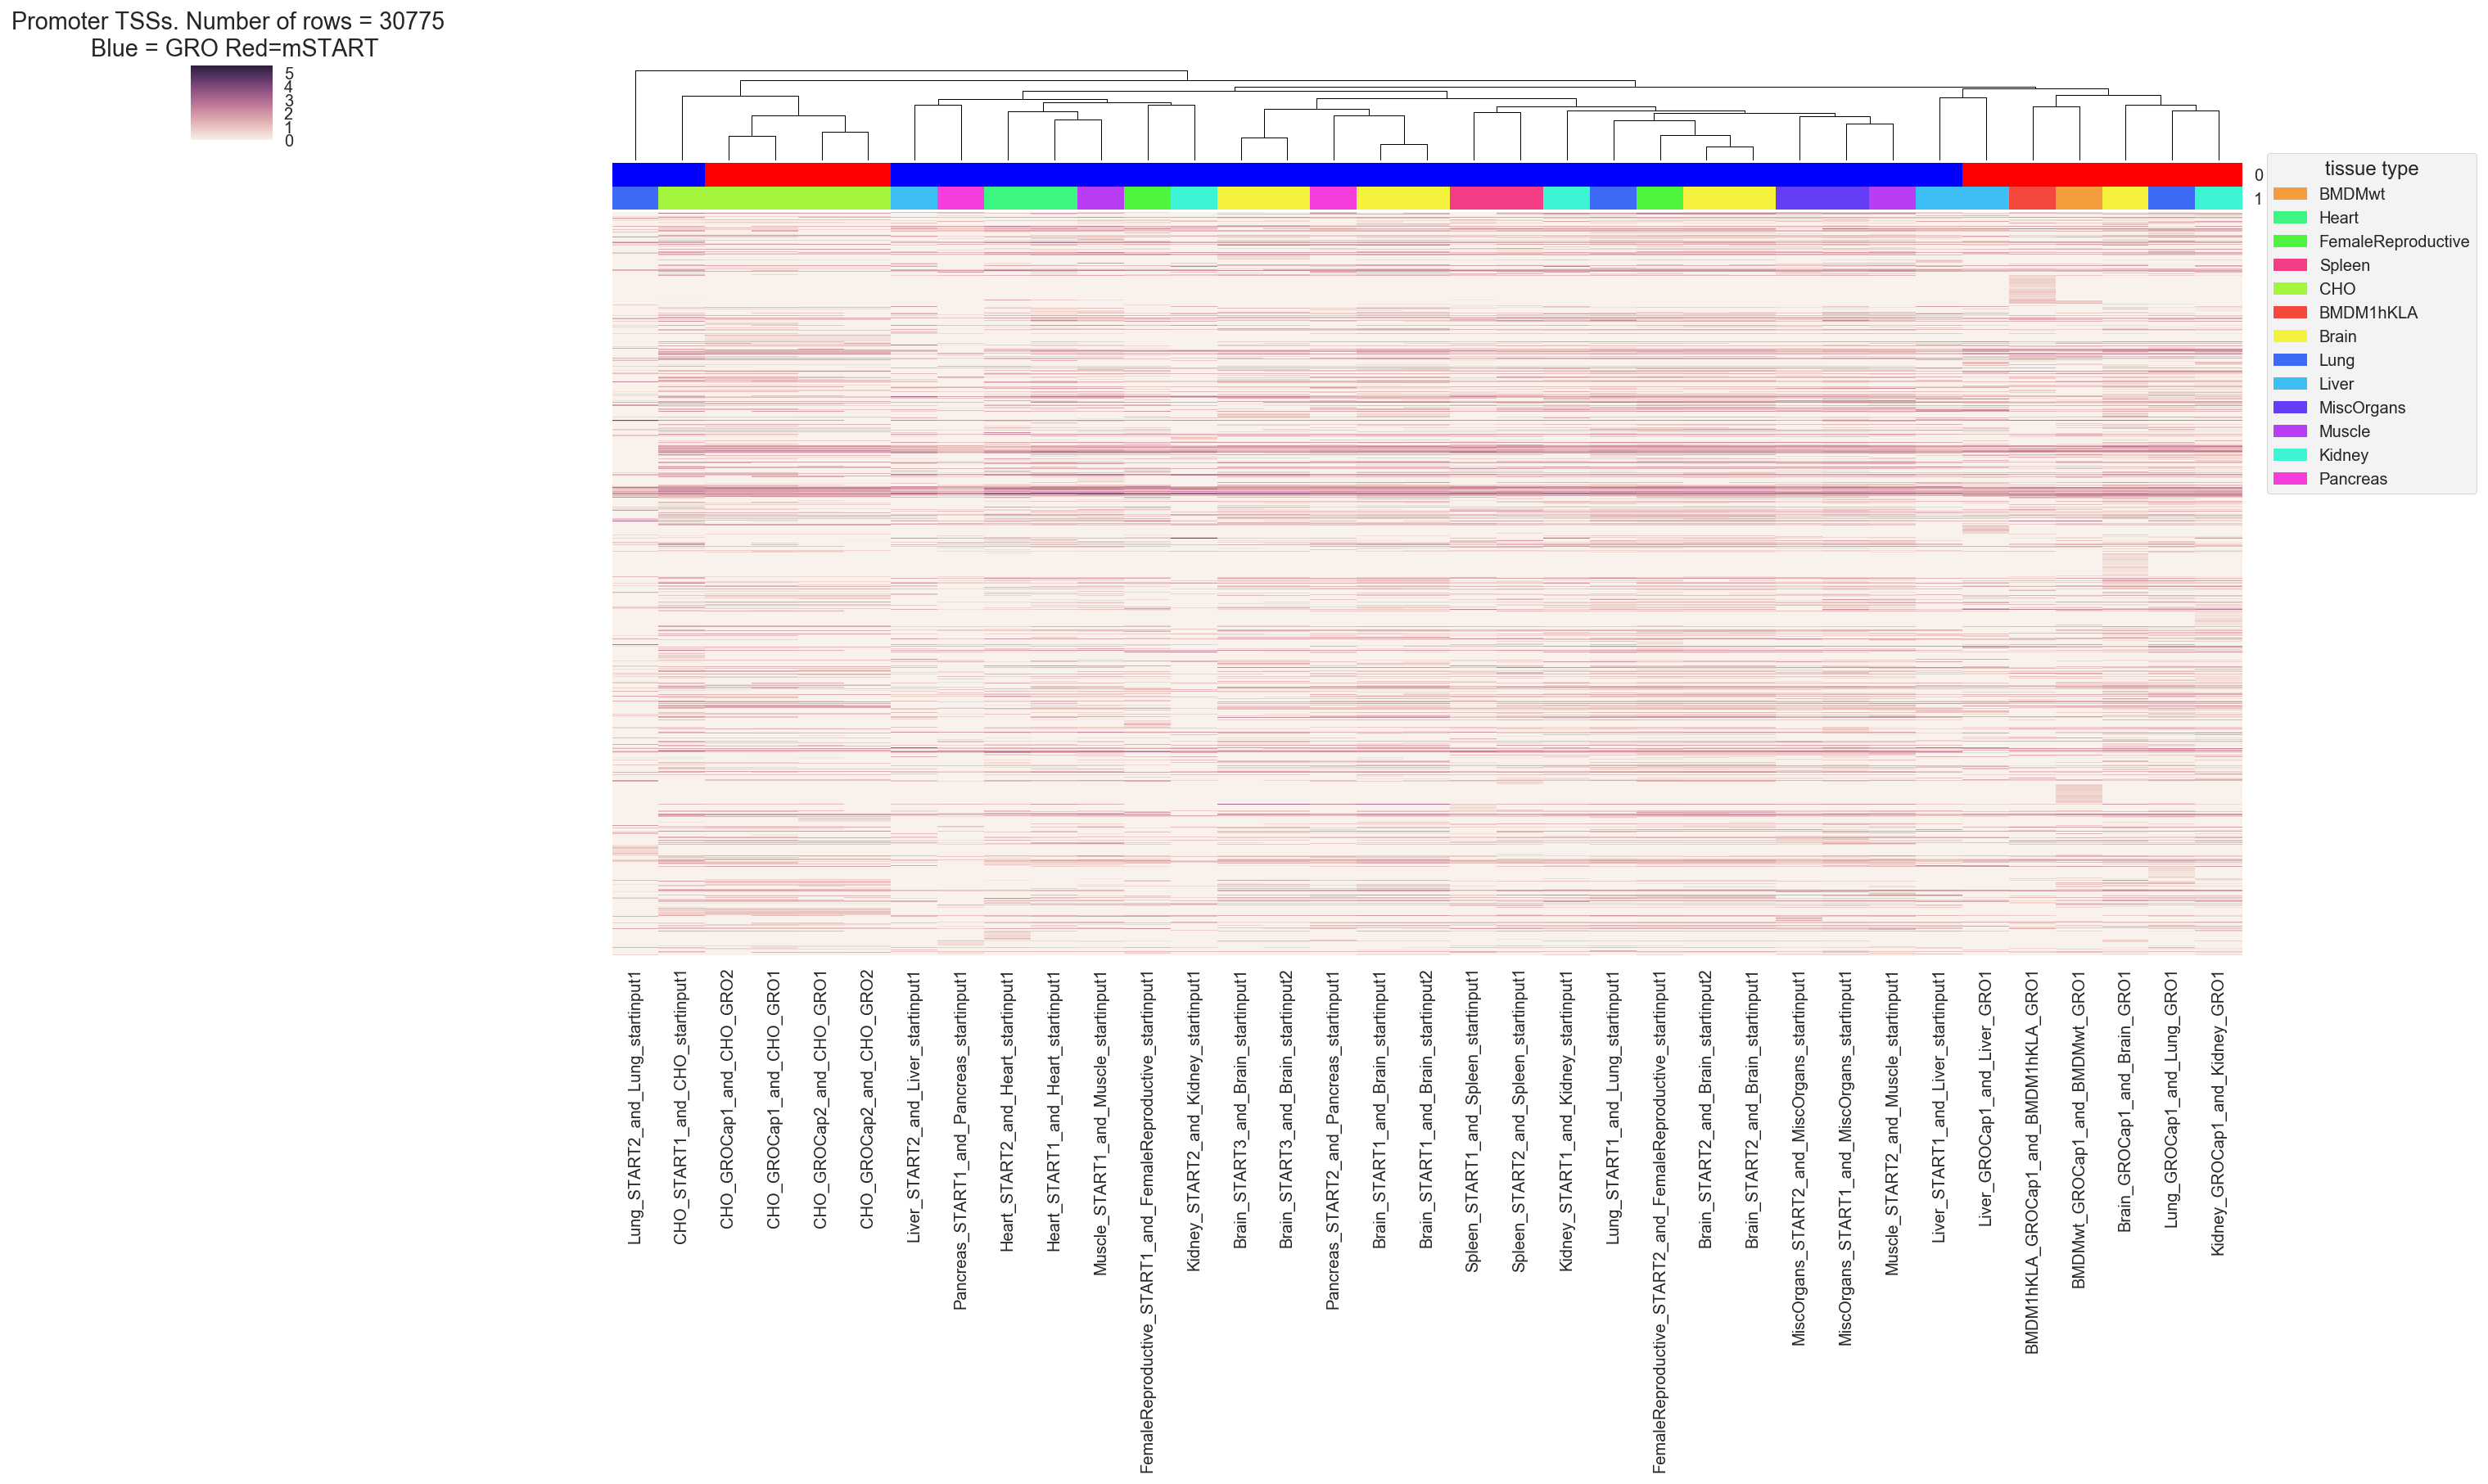

In [11]:
prom = (expr_df[expr_df.index.isin(promoter_meta["ID"])])
n_tis = len(tissues)

# Setup colors
lut = dict(zip(np.unique(exp_dict.values()), "rb"))
col_colors = pd.Series(exp_dict).map(lut)

lut2 = dict(zip(np.unique(tis_dict.values()), sns.hls_palette(n_tis,s=0.9)))
col_colors2 = pd.Series(tis_dict).map(lut2)

#legend_TN = [mpatches.Patch(color=i[1], label=i[0]) for i in col_colors2.iteritems()]
legend_TN = [mpatches.Patch(color=lut2[i], label=i) for i in lut2]

# Cluster and pl ot
# g = sns.clustermap(prom,col_cluster=True,figsize=(20,10),metric='jaccard',row_cluster=False
#                    ,yticklabels=False,col_colors=[col_colors,col_colors2])#,xticklabels=meta_samples.loc[prom.columns.values,'Short'])

g = sns.clustermap(prom,col_cluster=True,figsize=(20,10),row_cluster=False
                   ,yticklabels=False,col_colors=pd.DataFrame([col_colors,col_colors2]).transpose())#,xticklabels=meta_samples.loc[prom.columns.values,'Short'])

# Setup legend
l2=g.ax_heatmap.legend(loc='center left',bbox_to_anchor=(1.01,0.85),handles=legend_TN,frameon=True)
l2.set_title(title='tissue type',prop={'size':12})

title = 'Promoter TSSs. Number of rows = %d \n Blue = GRO Red=mSTART' % len(prom)
plt.title(title)
plot_tss_results.helper_save('Results/Figures/SuppFigure_QC/duplicatePeaks_binary_jaccard_promoter_peak_cluster.png')
#g.savefig('Results/Figures/SuppFigure_QC/duplicatePeaks_binary_jaccard_promoter_peak_cluster.png',bbox_inches='tight')

In [127]:
import pyupset as pyu

SyntaxError: invalid syntax (visualisation.py, line 12)

In [9]:
def change_to_short_name(df_out):
    ''' Dirt way to make name shorter and clearer to be plotted after. Used in next cell'''
    all_col = df_out.columns.values
    all_new_col = []
    for col in all_col[:-2]:
        short_name = ''
        for i in col.split('/')[1].split('trim_')[1:]:
            short_name = short_name + i.split('_')[0]
        all_new_col.append(short_name)

    short_name
    all_new_col

    df_out.columns.values[:-2] = all_new_col
    
    return df_out

In [ ]:
for curr_tissue in tissues:
    curr_raw = glob.glob(data_folder + curr_tissue + '/*/')
    for j in curr_raw:
        curr_type = j.split('/')[-2]  
        if not curr_type == 'ATAC':
            count = 1
            for f in  glob.glob(j + '*f04_peaks/merge*bg*peak*venn.tsv'):
                name = curr_tissue + '_' + curr_type
                df_out = pd.read_csv(f,sep='\t')
                df_out = change_to_short_name(df_out)
                df_out = convert_intersection_HOMER_to_pyupset(df_out)
                out = pyu.plot(df_out)
                ax = out['figure'].gca()
                ax.set_title(curr_tissue + '_' + curr_type)
                